# Exploratory Data Analysis

### Héctor César Ornelas León

This Exploratory Data Analysis (EDA) focuses on a dataset containing 1 million transactions, with the goal of identifying patterns and insights that can help detect fraudulent activities. The dataset includes the next features:

- distance_from_home: The distance (in kilometers) from the transaction location to the cardholder's home.

- distance_from_last_transaction: The distance (in kilometers) from the current transaction location to the previous transaction location.

- ratio_to_median_purchase_price: The ratio of the transaction amount to the median purchase price.

- repeat_retailer: Whether the transaction occurred at the same retailer (1 = yes, 0 = no).

- used_chip: Whether the transaction was made using a chip (credit/debit card) (1 = yes, 0 = no).

- used_pin_number: Whether the transaction involved a PIN number (1 = yes, 0 = no).

- online_order: Whether the transaction was an online order (1 = yes, 0 = no).

- fraud: Whether the transaction was fraudulent (1 = yes, 0 = no).

The primary objective of this EDA is to:

- Understand the distribution and characteristics of the data.

- Identify potential relationships between features and the target variable (fraud).

- Detect anomalies, outliers, or missing values that may require preprocessing.

- Prepare the data for modeling by gaining insights into feature importance and data quality.

This analysis will serve as the foundation for building a robust fraud detection system using Machine Learning techniques.

In [33]:
import pandas as pd

# Load the dataset
data = pd.read_csv("data/credit_card_data.csv")
print(data.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [34]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None


In [35]:
print(data.describe())

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%   

#### Initial Overview**
We loaded the dataset and performed an initial exploration. Here's what we learned:

1. **Dataset Structure**:
   - The dataset contains **1,000,000 rows** and **8 columns**.
   - There are **no missing values**.

2. **Key Features**:
   - **`distance_from_home`**: Distance from the transaction location to the cardholder's home.
   - **`distance_from_last_transaction`**: Distance from the current transaction location to the previous one.
   - **`ratio_to_median_purchase_price`**: Ratio of the transaction amount to the median purchase price.
   - **`repeat_retailer`**: Whether the transaction occurred at the same retailer (1 = yes, 0 = no).
   - **`used_chip`**: Whether the transaction was made using a chip (1 = yes, 0 = no).
   - **`used_pin_number`**: Whether the transaction involved a PIN number (1 = yes, 0 = no).
   - **`online_order`**: Whether the transaction was an online order (1 = yes, 0 = no).
   - **`fraud`**: Whether the transaction was fraudulent (1 = yes, 0 = no).

3. **Descriptive Statistics**:
   - The dataset is **highly imbalanced**: Only **8.74%** of transactions are fraudulent (`fraud = 1`).
   - Features like `distance_from_home` and `distance_from_last_transaction` have **wide ranges** and **outliers** (e.g., max values are extremely high).
   - Most transactions are from **repeat retailers** (88.15%) and are **online orders** (65.06%).
   - Only **10.06%** of transactions used a PIN number, and **35.04%** used a chip.

4. **Next Steps**:
   - Explore the distribution of the target variable (`fraud`) in more detail.
   - Investigate potential relationships between features and the target variable.
   - Handle class imbalance.

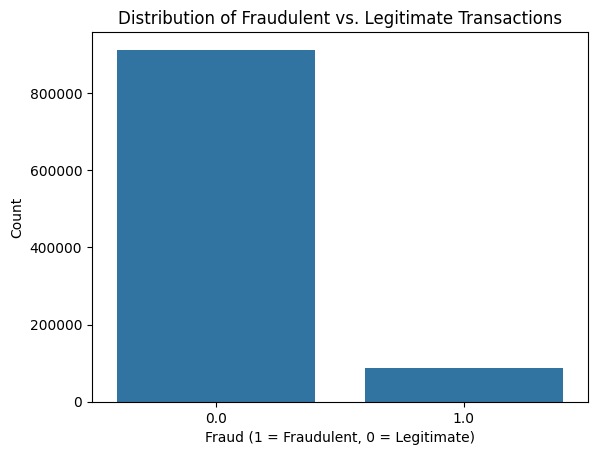

Percentage of fraudulent transactions: 8.74%


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(x='fraud', data=data)
plt.title("Distribution of Fraudulent vs. Legitimate Transactions")
plt.xlabel("Fraud (1 = Fraudulent, 0 = Legitimate)")
plt.ylabel("Count")
plt.show()

# Percentage of fraudulent transactions
fraud_percentage = data['fraud'].value_counts(normalize=True) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage[1]:.2f}%")

This imbalance is a critical factor to consider when building a fraud detection model, as models trained on imbalanced data may bias toward the majority class (legitimate transactions).

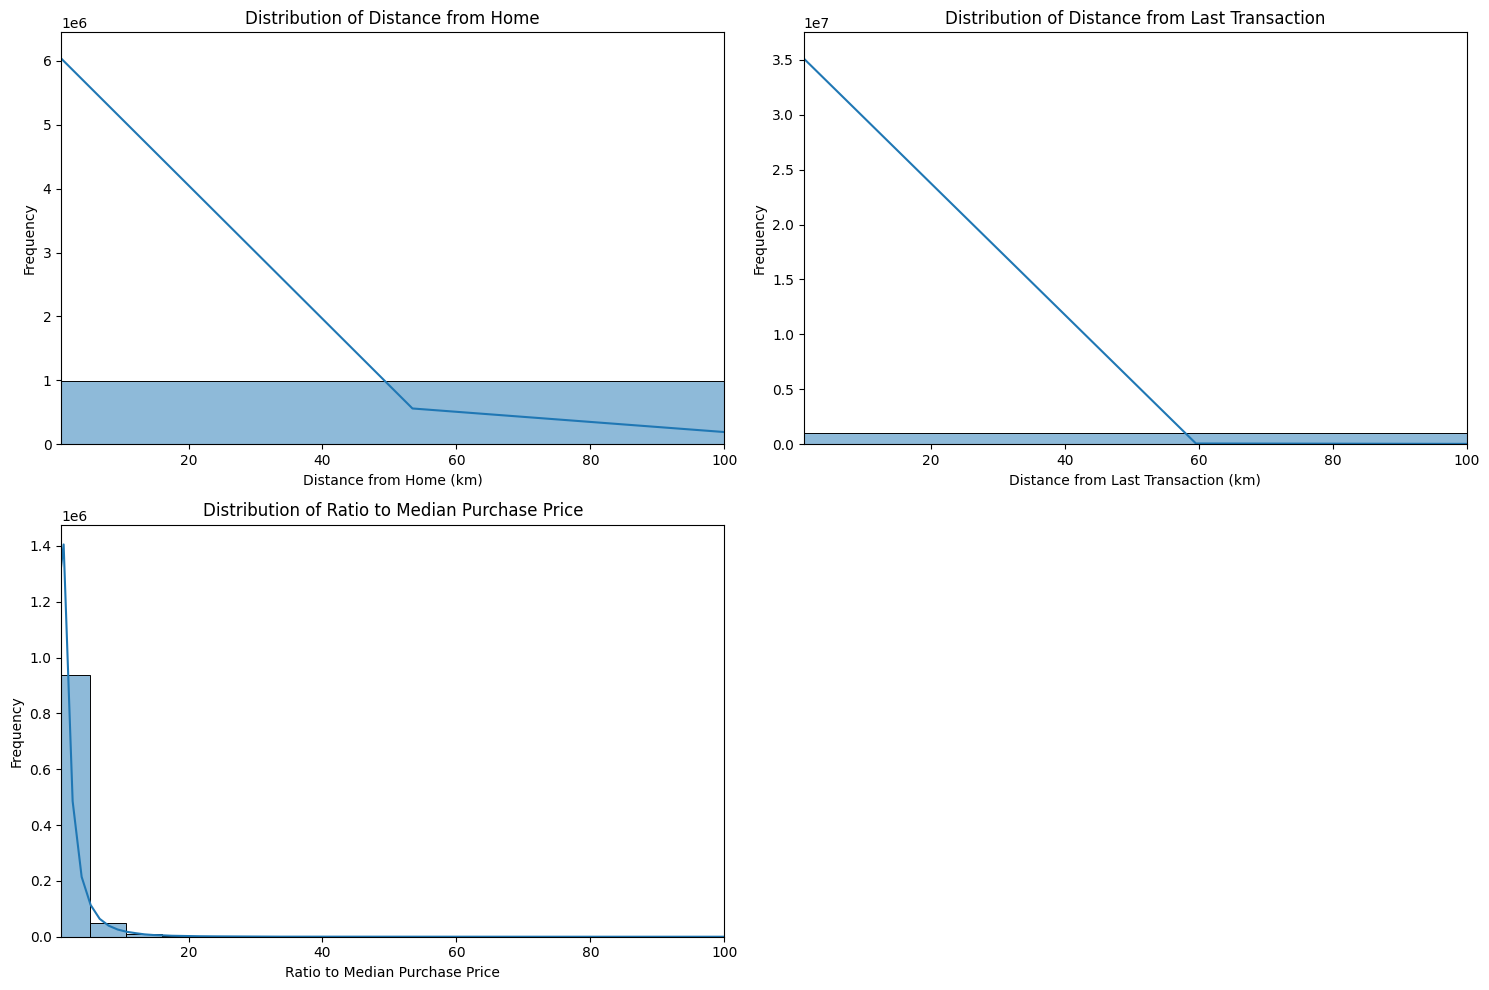

In [37]:
# Distribution of numerical features
plt.figure(figsize=(15, 10))

# Plot 1: distance_from_home
plt.subplot(2, 2, 1)
sns.histplot(data['distance_from_home'], bins=50, kde=True)
plt.xlim(1, 100)
plt.title("Distribution of Distance from Home")
plt.xlabel("Distance from Home (km)")
plt.ylabel("Frequency")

# Plot 2: distance_from_last_transaction
plt.subplot(2, 2, 2)
sns.histplot(data['distance_from_last_transaction'], bins=50, kde=True)
plt.xlim(1, 100)
plt.title("Distribution of Distance from Last Transaction")
plt.xlabel("Distance from Last Transaction (km)")
plt.ylabel("Frequency")

# Plot 3: ratio_to_median_purchase_price
plt.subplot(2, 2, 3)
sns.histplot(data['ratio_to_median_purchase_price'], bins=50, kde=True)
plt.xlim(1, 100)
plt.title("Distribution of Ratio to Median Purchase Price")
plt.xlabel("Ratio to Median Purchase Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### **Distribution of Numerical Features**
- **`distance_from_home`**: Most transactions occur within **1-100 km** from home, with a peak around **0-20 km**.
- **`distance_from_last_transaction`**: Most transactions occur within **1-60 km** from the last transaction, with a peak around **0-20 km**.
- **`ratio_to_median_purchase_price`**: Most transactions have a ratio between **1-10**, with a peak around **1-5**.

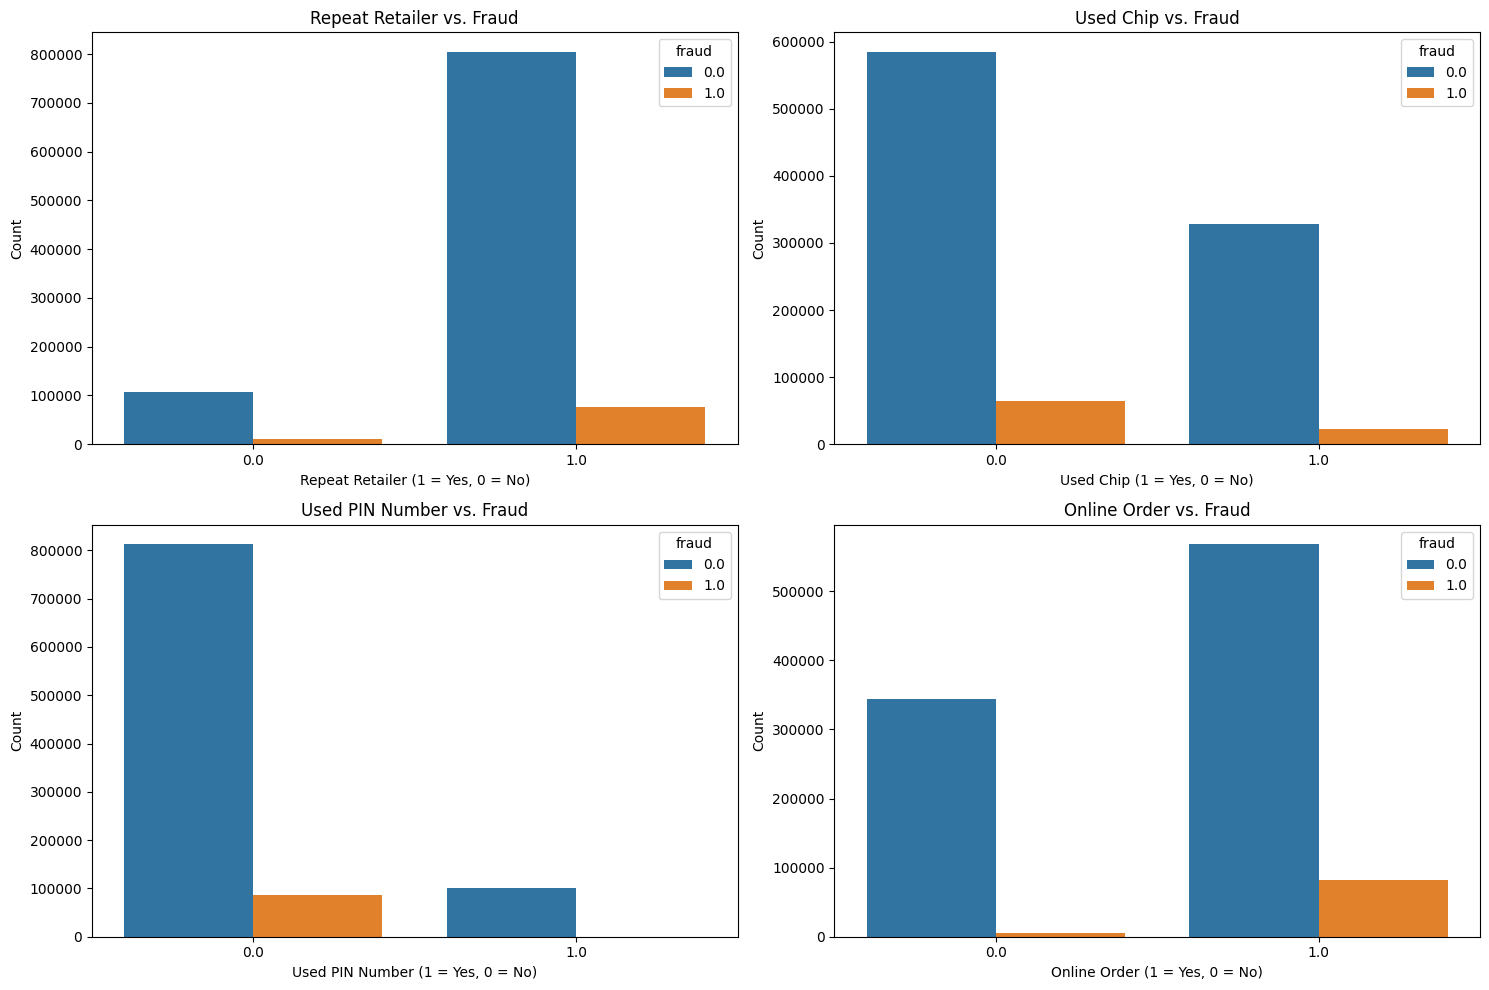

In [38]:
# Distribution of categorical features
plt.figure(figsize=(15, 10))

# Plot 1: repeat_retailer
plt.subplot(2, 2, 1)
sns.countplot(x='repeat_retailer', hue='fraud', data=data)
plt.title("Repeat Retailer vs. Fraud")
plt.xlabel("Repeat Retailer (1 = Yes, 0 = No)")
plt.ylabel("Count")

# Plot 2: used_chip
plt.subplot(2, 2, 2)
sns.countplot(x='used_chip', hue='fraud', data=data)
plt.title("Used Chip vs. Fraud")
plt.xlabel("Used Chip (1 = Yes, 0 = No)")
plt.ylabel("Count")

# Plot 3: used_pin_number
plt.subplot(2, 2, 3)
sns.countplot(x='used_pin_number', hue='fraud', data=data)
plt.title("Used PIN Number vs. Fraud")
plt.xlabel("Used PIN Number (1 = Yes, 0 = No)")
plt.ylabel("Count")

# Plot 4: online_order
plt.subplot(2, 2, 4)
sns.countplot(x='online_order', hue='fraud', data=data)
plt.title("Online Order vs. Fraud")
plt.xlabel("Online Order (1 = Yes, 0 = No)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### **Distribution of Categorical Features**
- **`repeat_retailer`**: Most transactions are from repeat retailers. Fraudulent transactions are slightly more common in non-repeat retailers.
- **`used_chip`**: Transactions using a chip are less likely to be fraudulent compared to those without a chip.
- **`used_pin_number`**: Transactions using a PIN are significantly less likely to be fraudulent.
- **`online_order`**: Online orders have a higher likelihood of being fraudulent compared to in-person transactions.

We’ll create a process of feature engineering to capture potential relationships between categorical variables. For this case:

* online_order * used_pin_number: Combines the effect of online orders and PIN usage.

* used_chip * repeat_retailer: Combines the effect of chip usage and repeat retailers.

In [39]:
# Create features
data['online_pin'] = data['online_order'] * data['used_pin_number']
data['chip_repeat'] = data['used_chip'] * data['repeat_retailer']

# Display the first few rows with new features
print(data[['online_order', 'used_pin_number', 'online_pin', 'used_chip', 'repeat_retailer', 'chip_repeat']].head())

   online_order  used_pin_number  online_pin  used_chip  repeat_retailer  \
0           0.0              0.0         0.0        1.0              1.0   
1           0.0              0.0         0.0        0.0              1.0   
2           1.0              0.0         0.0        0.0              1.0   
3           1.0              0.0         0.0        1.0              1.0   
4           1.0              0.0         0.0        1.0              1.0   

   chip_repeat  
0          1.0  
1          0.0  
2          0.0  
3          1.0  
4          1.0  


Next, we’ll analyze the correlation matrix to understand how features relate to each other and to the target variable (fraud). We’ll also visualize the correlations using a heatmap.

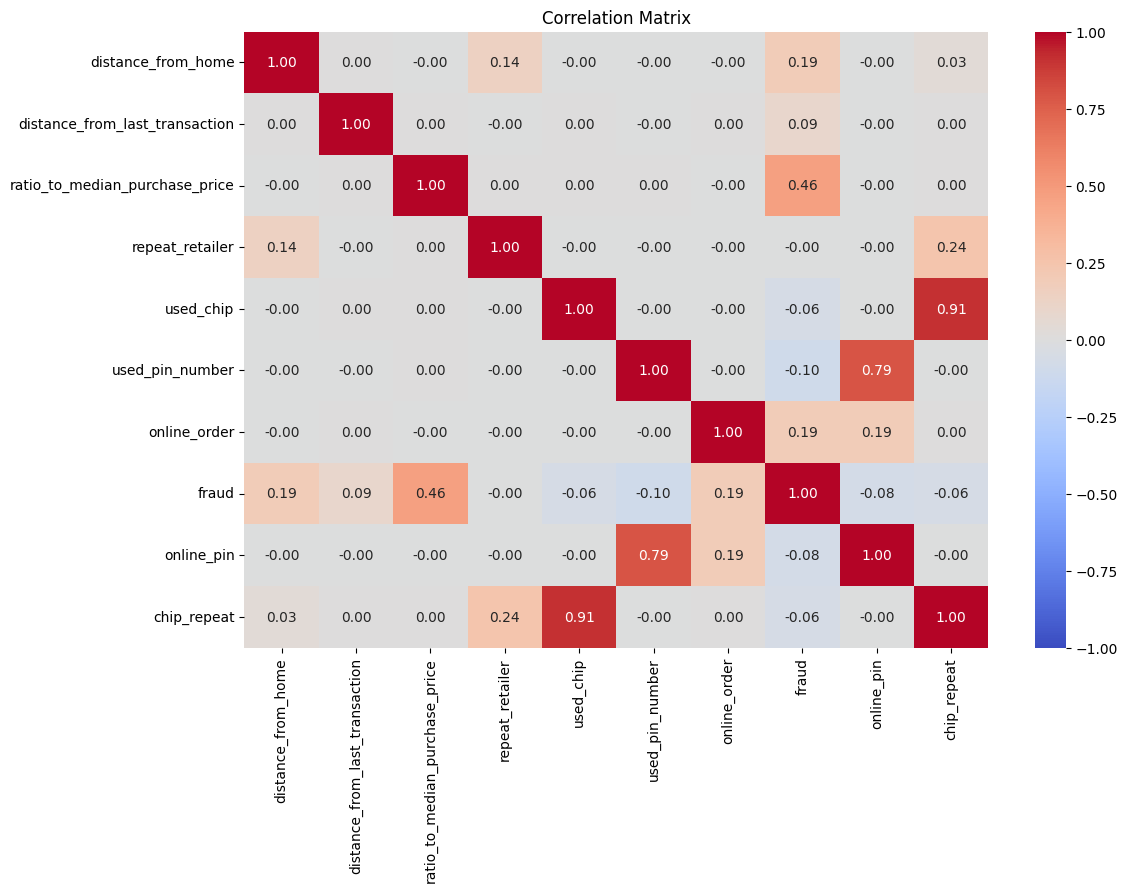

fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
chip_repeat                      -0.056787
used_chip                        -0.060975
online_pin                       -0.077976
used_pin_number                  -0.100293
Name: fraud, dtype: float64


In [40]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Display correlation with the target variable (fraud)
print(corr_matrix['fraud'].sort_values(ascending=False))

#### **Correlation Analysis**
- **Top Features Correlated with `fraud`**:
  - `ratio_to_median_purchase_price` (**0.46**): Strongest positive correlation.
  - `online_order` (**0.19**): Moderate positive correlation.
  - `distance_from_home` (**0.19**): Moderate positive correlation.
  - `distance_from_last_transaction` (**0.09**): Weak positive correlation.
  - `used_pin_number` (**-0.10**): Weak negative correlation.
- **New Features**:
  - `online_pin` and `chip_repeat` show weak correlations with `fraud`.


We’ll create a new DataFrame with only the selected features and the target variable (fraud).

In [41]:
# Select top 5 features and target variable considering correlation
selected_features = ['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 
                    'distance_from_last_transaction', 'used_pin_number', 'fraud']
data_selected = data[selected_features]
print(data_selected.head())

   ratio_to_median_purchase_price  online_order  distance_from_home  \
0                        1.945940           0.0           57.877857   
1                        1.294219           0.0           10.829943   
2                        0.427715           1.0            5.091079   
3                        0.362663           1.0            2.247564   
4                        2.222767           1.0           44.190936   

   distance_from_last_transaction  used_pin_number  fraud  
0                        0.311140              0.0    0.0  
1                        0.175592              0.0    0.0  
2                        0.805153              0.0    0.0  
3                        5.600044              0.0    0.0  
4                        0.566486              0.0    0.0  


In [42]:
# Define features (X) and target variable (y)
X = data[['ratio_to_median_purchase_price', 'online_order', 
            'distance_from_home', 'distance_from_last_transaction', 
            'used_pin_number']]
y = data['fraud']

We’ll split the data into training and testing sets (e.g., 90% training, 10% testing).

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Check the shape of the resulting datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (900000, 5), (900000,)
Testing set: (100000, 5), (100000,)


We discovered that the dataset is highly imbalanced (only 8.74% of transactions are fraudulent). We’ll use SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.

In [44]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Modeling

We’ll start with Logistic Regression as a baseline model. This will help us establish a performance benchmark.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     91297
         1.0       0.57      0.95      0.71      8703

    accuracy                           0.93    100000
   macro avg       0.78      0.94      0.84    100000
weighted avg       0.96      0.93      0.94    100000

Confusion Matrix:
[[85058  6239]
 [  475  8228]]
ROC-AUC Score:
0.9385418574292225


Next, we’ll use a Random Forest model, which is more robust and can capture non-linear relationships.

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("ROC-AUC Score (Random Forest):")
print(roc_auc_score(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     91297
         1.0       0.87      1.00      0.93      8703

    accuracy                           0.99    100000
   macro avg       0.93      0.99      0.96    100000
weighted avg       0.99      0.99      0.99    100000

Confusion Matrix (Random Forest):
[[89964  1333]
 [   17  8686]]
ROC-AUC Score (Random Forest):
0.9917229758810583


Next, we’ll use XGBoost, a owerful gradient-boosting algorithm that often performs well on imbalanced datasets.

In [47]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("ROC-AUC Score (XGBoost):")
print(roc_auc_score(y_test, y_pred_xgb))

c:\Users\hecto\Anaconda3\envs\fraud-detection-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     91297
         1.0       0.85      1.00      0.92      8703

    accuracy                           0.98    100000
   macro avg       0.93      0.99      0.95    100000
weighted avg       0.99      0.98      0.99    100000

Confusion Matrix (XGBoost):
[[89771  1526]
 [   27  8676]]
ROC-AUC Score (XGBoost):
0.9900914715214214


### **Comparison of Models**

| Model               | Accuracy | ROC-AUC | False Positives (FP) | False Negatives (FN) |
|---------------------|----------|---------|----------------------|----------------------|
| Logistic Regression | 93%      | 0.939   | 6,239                | 475                  |
| Random Forest       | 99%      | 0.992   | 1,333                | 17                   |
| XGBoost             | 98%      | 0.990   | 1,526                | 27                   |

- **Random Forest** is the best-performing model, with the highest ROC-AUC and the fewest misclassifications.
- **XGBoost** is a close second, with slightly more false positives and false negatives.
- **Logistic Regression** is a good baseline but underperforms compared to the ensemble methods.

#### Threshold Tuning

By default, the model uses a threshold of 0.5 to classify transactions as fraudulent or legitimate. However, we can adjust this threshold to optimize for precision (reduce false positives) or recall (reduce false negatives), depending on business needs.

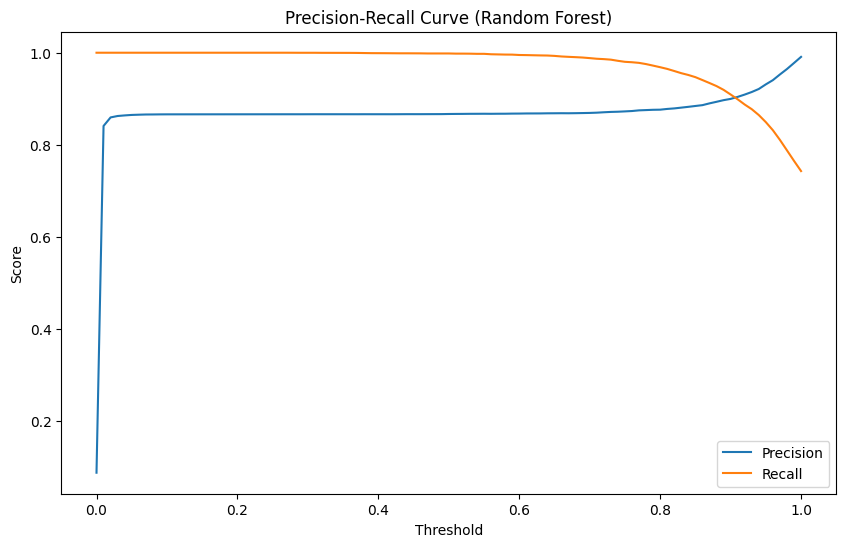

In [51]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class (fraud)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.title("Precision-Recall Curve (Random Forest)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

#### **Decision to Stay with the 0.5 Threshold**
After analyzing the precision-recall curve and considering the business context, I have decided to **stay with the default threshold of 0.5**. This threshold provides a **balanced approach** between precision and recall, ensuring that the model neither flags too many legitimate transactions as fraud (high false positives) nor misses too many fraudulent transactions (high false negatives). Given the importance of maintaining both **customer satisfaction** (minimizing false positives) and **financial security** (minimizing false negatives), a balanced threshold is the most suitable choice.

 Additionally, the model's performance at this threshold is already strong, with high accuracy and ROC-AUC scores, making it a reliable choice for deployment.

Now we'll save the trained Random Forest model for deployment.

In [53]:
import joblib

# Save the Random Forest model
joblib.dump(rf, "model/rf_fraud_detection.pkl")

# To load the model later:
# rf = joblib.load("random_forest_fraud_detection.pkl")

['model/rf_fraud_detection.pkl']